# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [265]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Load Dataset

In [266]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### Explore Data

You can rename columns to more usable, if you need.

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [268]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [269]:
df.rename(columns={"Annual Income (k$)":"Annual_Income", 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)

#it can be useful to rename of the columns.

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [270]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [271]:
df.isnull().any().sum()

0

In [272]:
df.duplicated().any()

False

<AxesSubplot:>

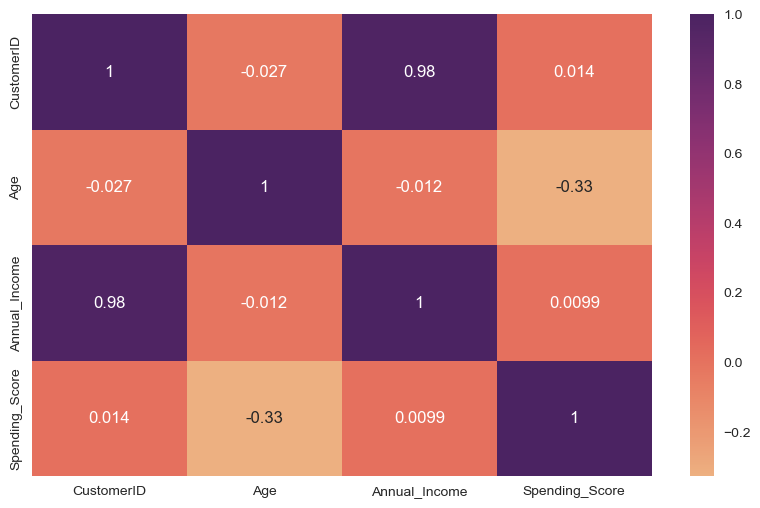

In [273]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot =True, cmap = "flare")


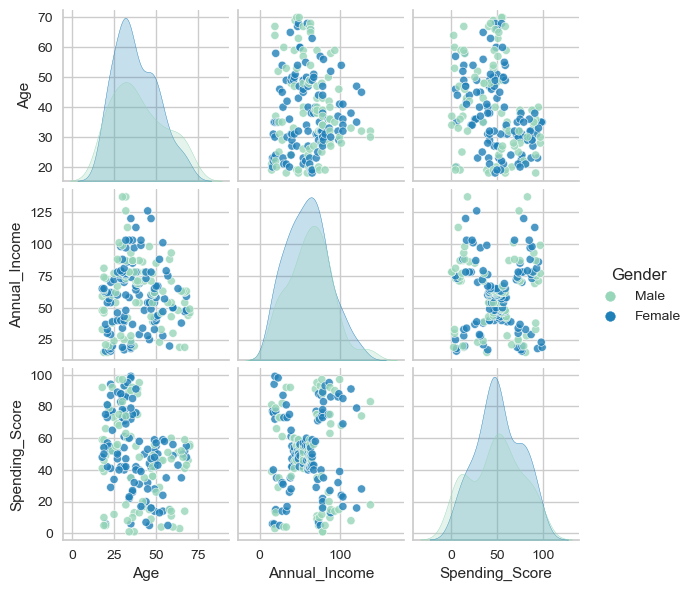

In [274]:
sns.pairplot(df, x_vars = ["Age", "Annual_Income", "Spending_Score"], 
               y_vars = ["Age", "Annual_Income", "Spending_Score"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8})

# datamız kümelemeye meyilli mi değil mi meyilliyse kaç kümeye bölebilirim ? 
# minimal intra cluster distance and maximal inter cluster distance diye belirttiğimiz ideal kümeleme mantığını
# clustering porblemlerinin her aşamasında aklımızdan çıkarmamalıyız.

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [275]:
X1=df.loc[:,["Age","Spending_Score"]]
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [12]:
X1.shape

(200, 2)

#### *ii. Determine optimal number of clusters*

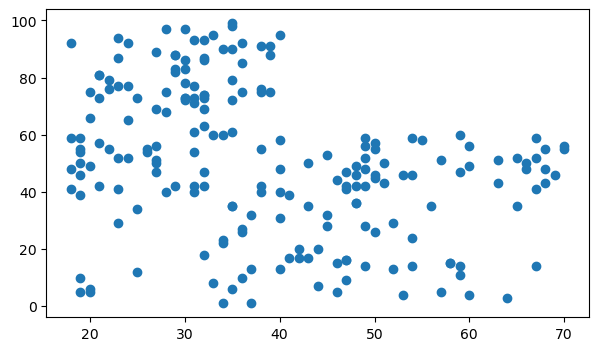

In [75]:
plt.scatter(df.Age, df.Spending_Score);

##### The Elbow Method to find the No. of Optimal Clusters

In [276]:
from sklearn.cluster import KMeans

In [277]:
ssd = []

K = range(2,11)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

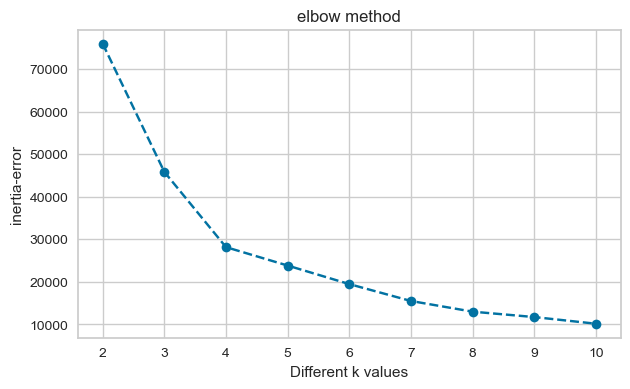

In [278]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [279]:
# elbow method'una göre sert düşüşün durduğu "ilk" nokta optimal k'dır.
#n_cluster = 4

In [18]:
ssd # sum of squared distance

[75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23838.248821646186,
 19483.1179104427,
 15514.193134351031,
 13006.48362885102,
 11738.020296954506,
 10173.039478114479]

In [19]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4327.334745
4     4355.130911
5     3968.924776
6     2507.709506
7     1268.463332
8     1564.980819
dtype: float64

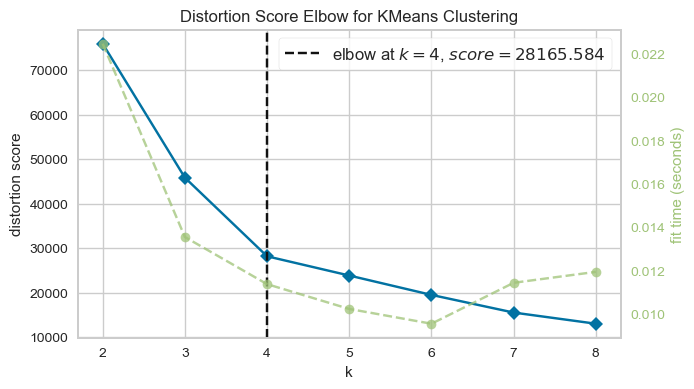

In [280]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

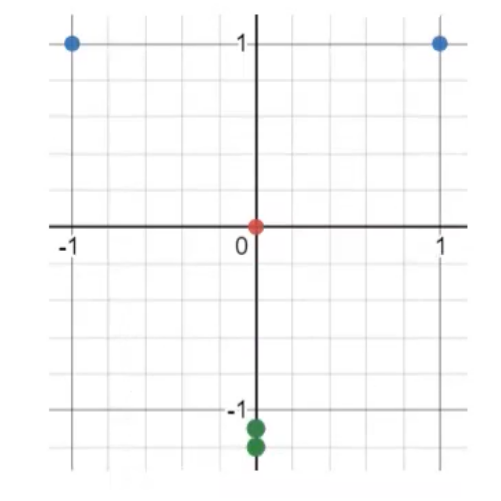

#### *iii. Apply K Means*

In [353]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=4, random_state=42)

In [354]:
K_means_model.fit(X1)

KMeans(n_clusters=4, random_state=42)

In [355]:
K_means_model.predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [356]:
K_means_model.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [357]:
K_means_model.labels_
# fit yaptıktan sonra doğrudan .labels_ ile de hangi gözlem hangi cluster'a atanmış görebiliriz.

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [358]:
from sklearn.metrics import silhouette_score

In [359]:
silhouette_score(X1, K_means_model.labels_)
# silhouette_score 1'e ne kadar yakınsa kümelemem o kadar kalitelidir.

0.49973941540141753

In [360]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


#### *iv. Visualizing and Labeling All the Clusters*

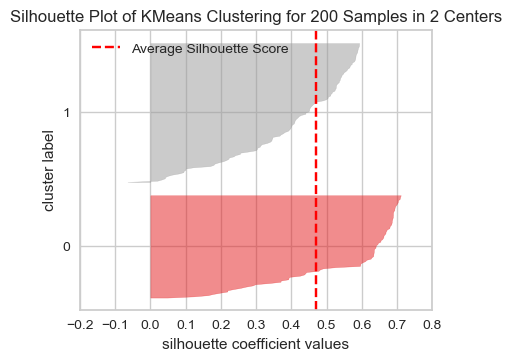

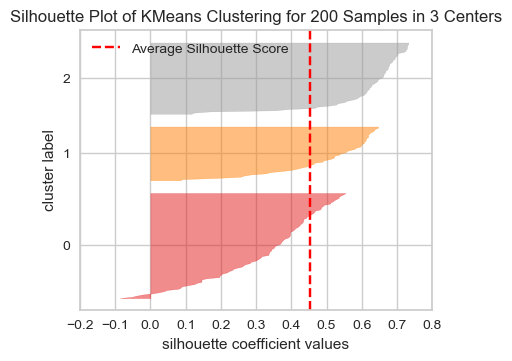

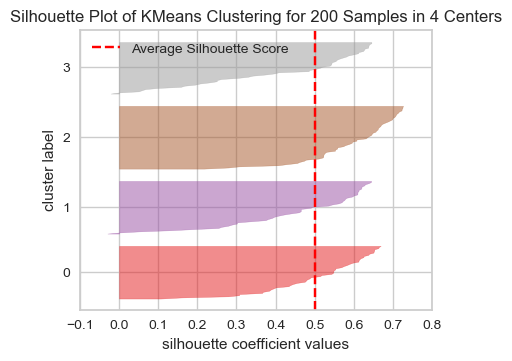

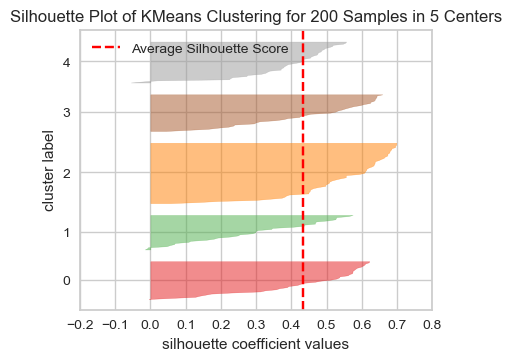

In [290]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,6):
    plt.figure(figsize=(10,8))  
    plt.subplot(2, 2,1)
    model3 = KMeans(n_clusters=i, random_state=42) 
    visualizer = SilhouetteVisualizer(model3)
    visualizer.fit(X1) 
    visualizer.poof();
    

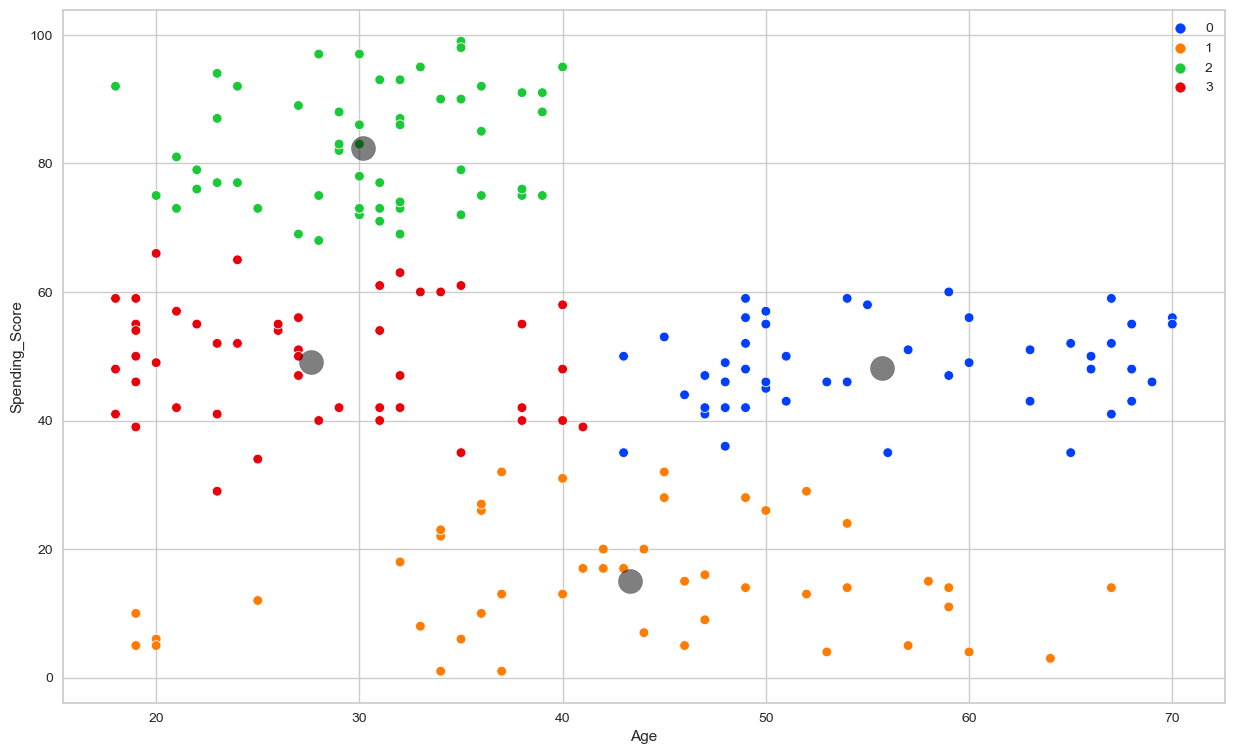

In [362]:
plt.figure(figsize=(15,9))
sns.scatterplot(df.Age, df.Spending_Score,hue=K_means_model.labels_, palette="bright")
centers = K_means_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [291]:
X2=df.loc[:,["Annual_Income","Spending_Score"]]
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


#### *ii. Determine optimal number of clusters*

In [292]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,11)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

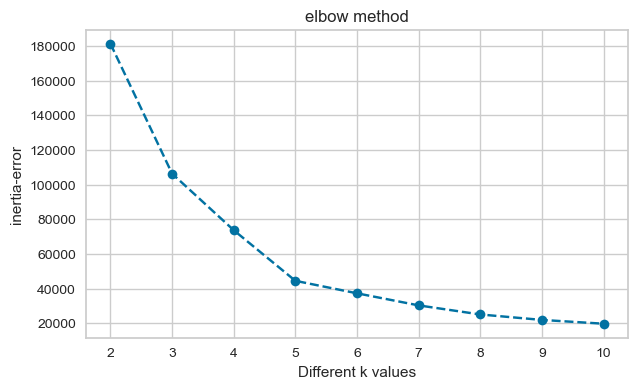

In [293]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

##### The Elbow Method to find the No. of Optimal Clusters

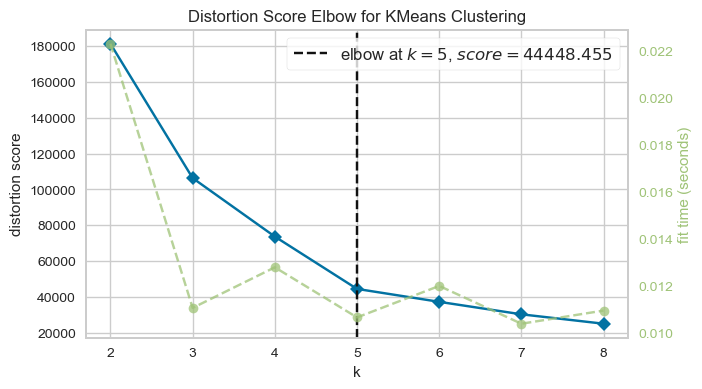

In [294]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [363]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [364]:
K_means_model.fit(X2)

KMeans(n_clusters=5, random_state=42)

In [365]:
print("K_means_model prediction:\n",K_means_model.predict(X2))
print("-"*75)
print("K_means_model fit:\n",K_means_model.fit_predict(X2))
print("-"*75)
print("K_means_model labels:\n",K_means_model.labels_)#fit yaptıktan sonra doğrudan labels_ ile de hangi gözlem hangi cluster'a atanmış görebiliriz


K_means_model prediction:
 [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
---------------------------------------------------------------------------
K_means_model fit:
 [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
---------------------------------------------------------------

In [366]:
from sklearn.metrics import silhouette_score

In [367]:
silhouette_score(X2, K_means_model.labels_)
# silhouette_score 1'e ne kadar yakınsa kümelemem o kadar kalitelidir.

0.553931997444648

In [368]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


#### *iv. Visualizing and Labeling All the Clusters*

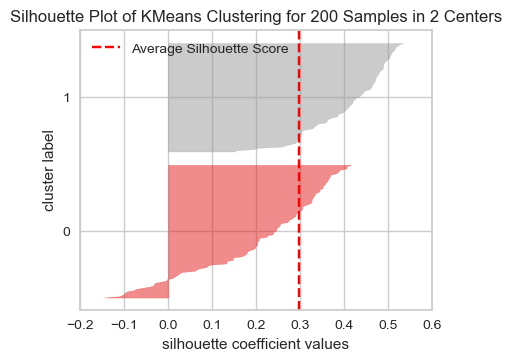

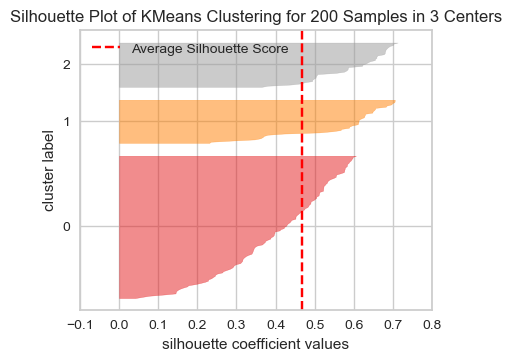

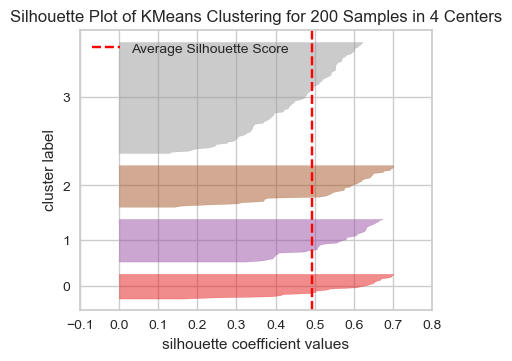

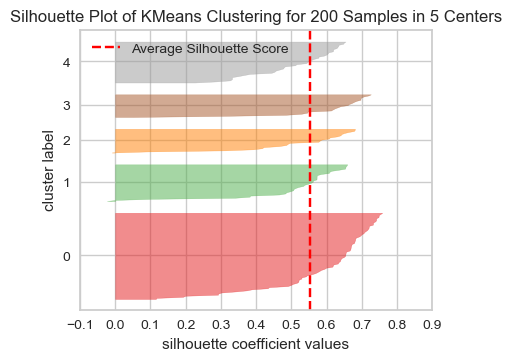

In [369]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,6):
    plt.figure(figsize=(10,8))  
    plt.subplot(2, 2,1)
    model4 = KMeans(n_clusters=i, random_state=42) 
    visualizer = SilhouetteVisualizer(model4)
    visualizer.fit(X2) 
    visualizer.poof();

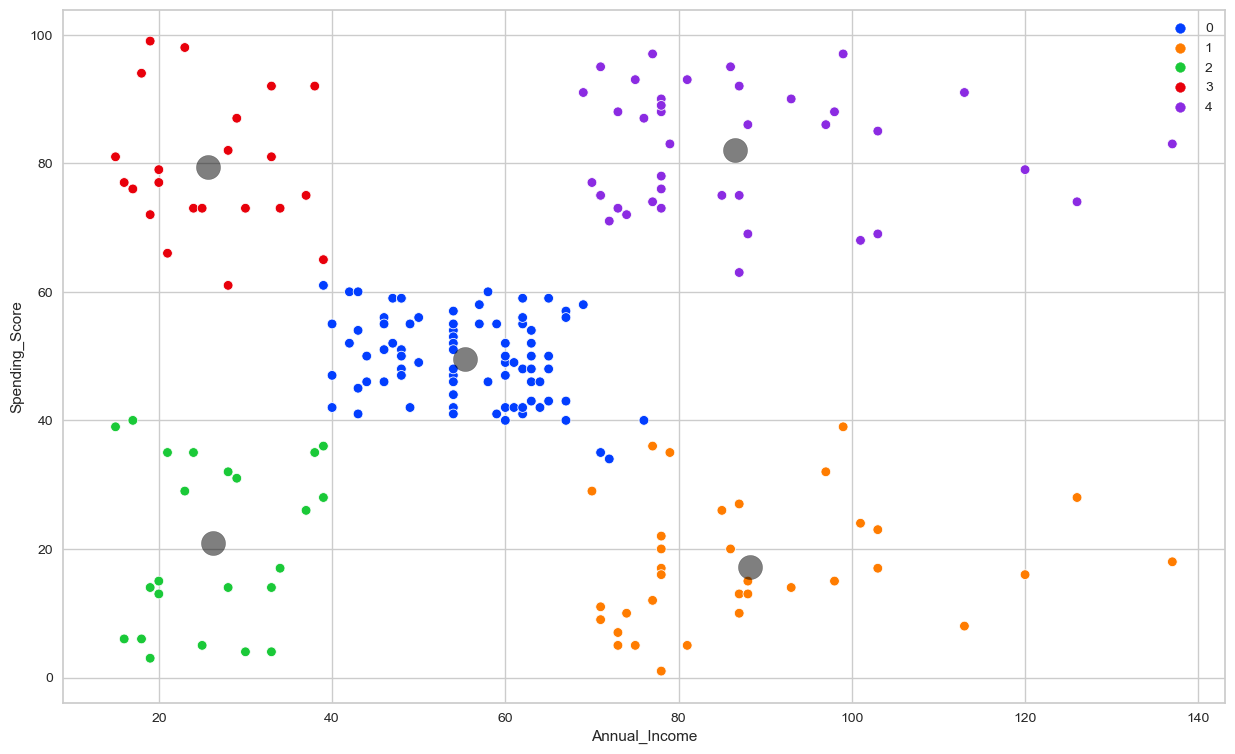

In [372]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue=K_means_model.labels_, data=X2, palette="bright")
centers = K_means_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Hierarchical Clustering

In [435]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [303]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]


In [309]:
X = df.iloc[:,[2,3,4]]
X.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [310]:
hopkins(X, X.shape[0])

0.30268248257826535

#### Dendrogram

In [311]:

from scipy.cluster.hierarchy import dendrogram, linkage

In [312]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

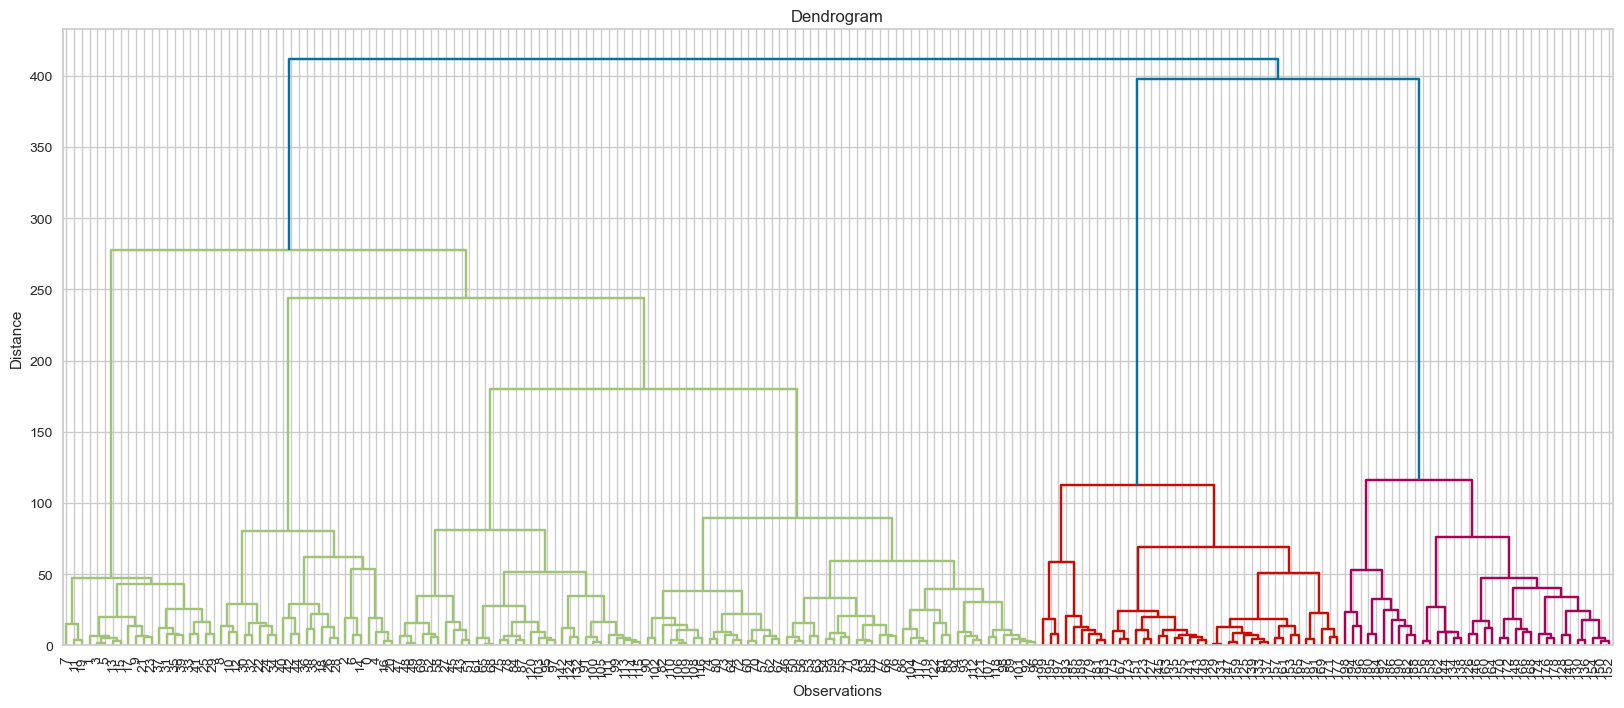

In [313]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

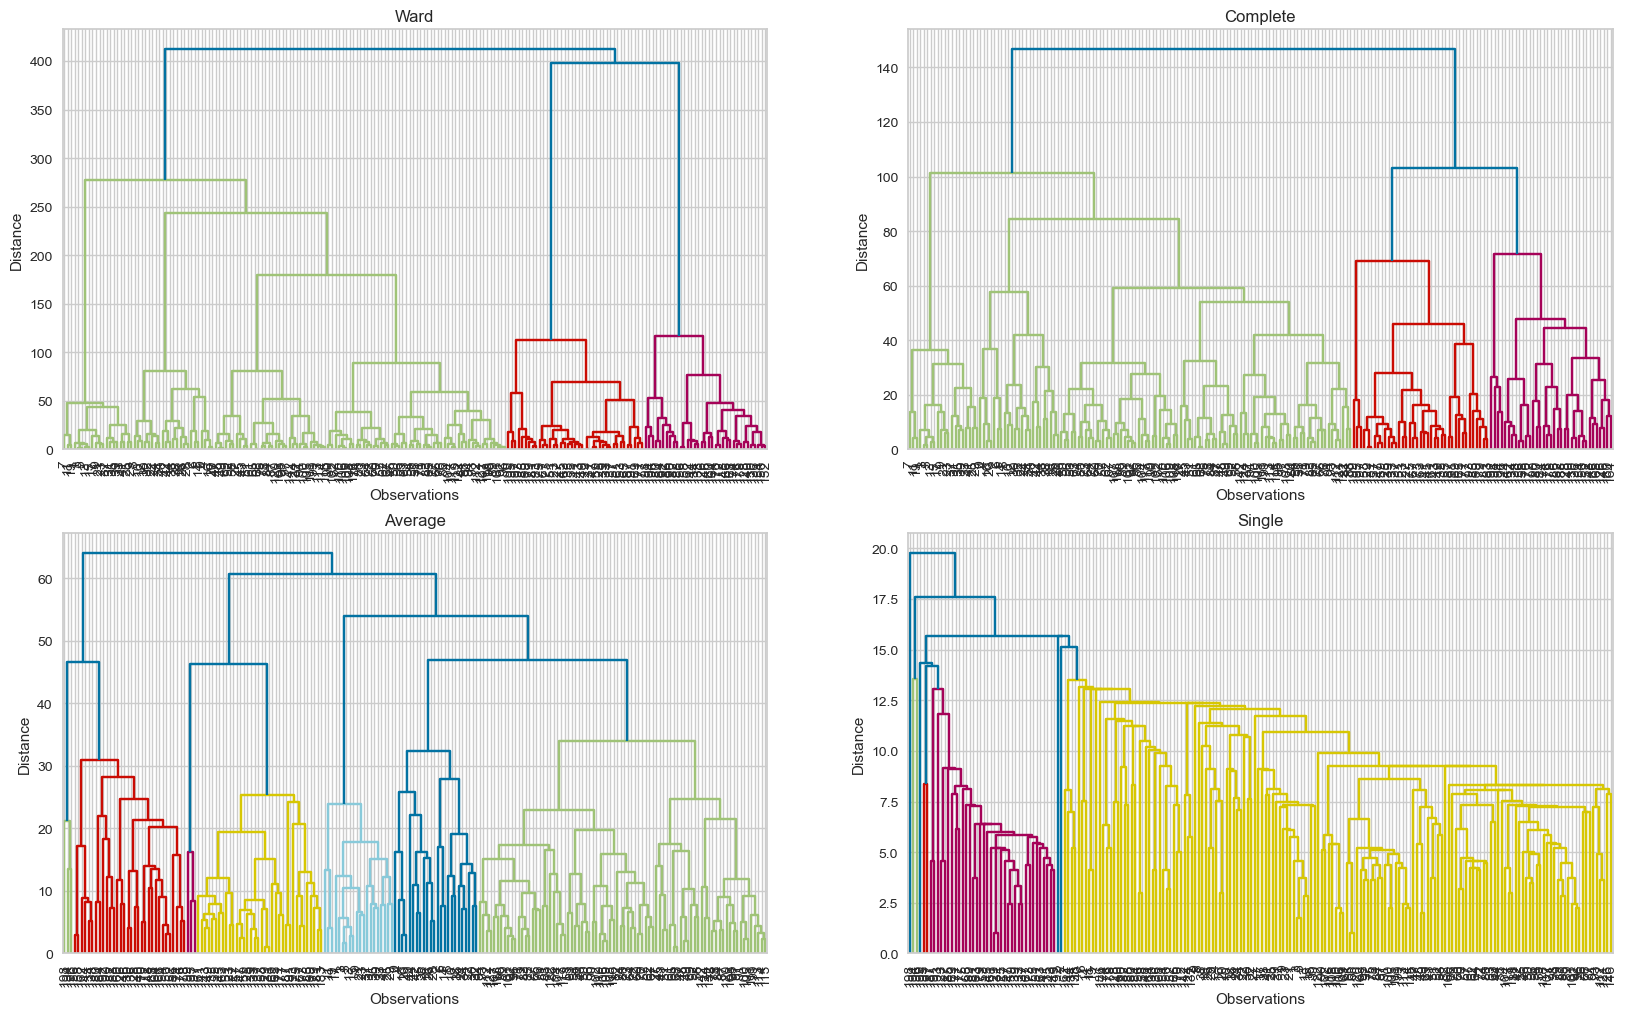

In [314]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [315]:
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


In [316]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

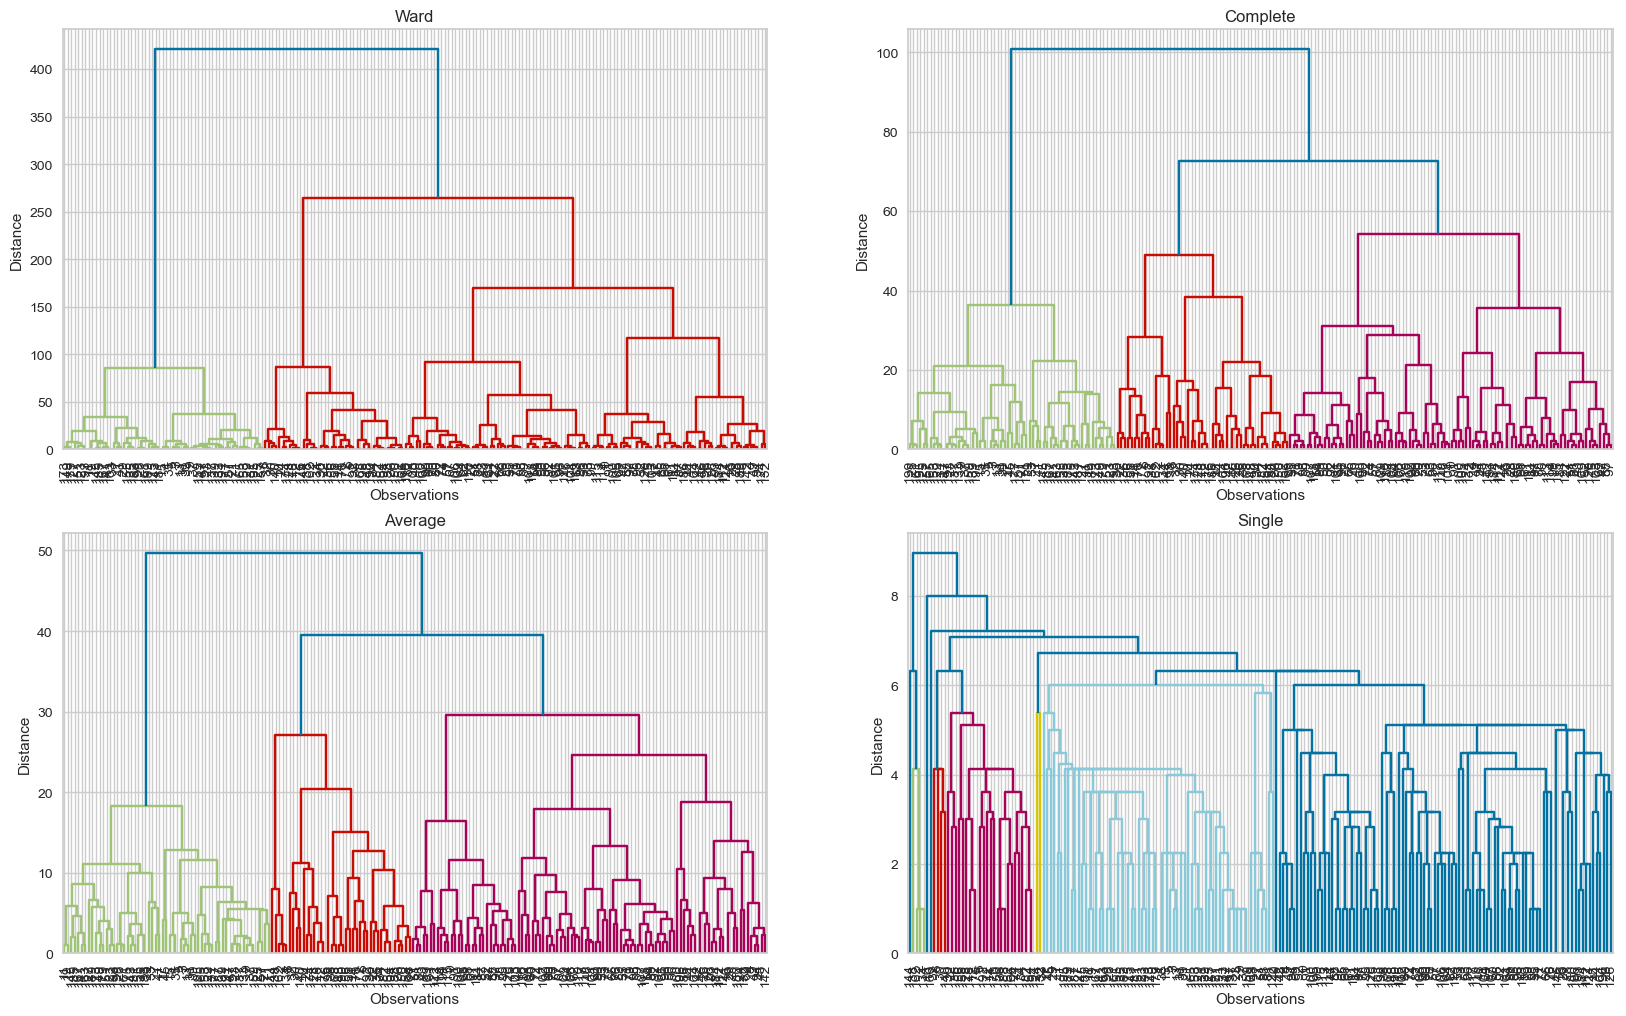

In [317]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

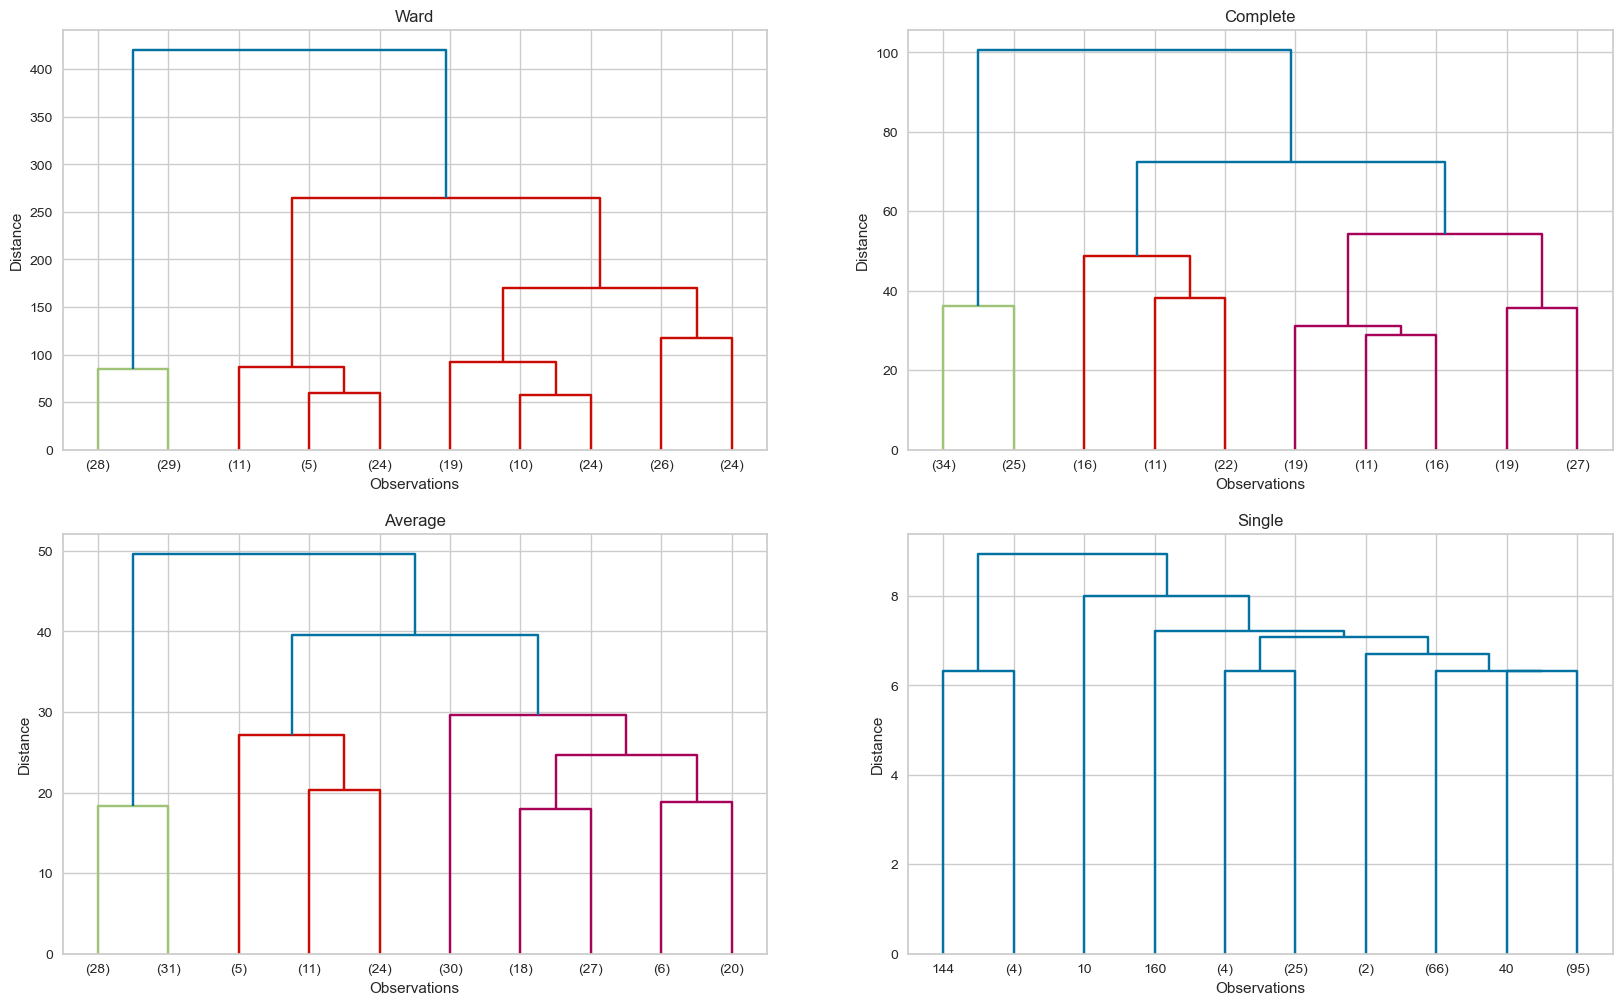

In [180]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

## Clustering based on Annual Income and Spending Score- x2

In [436]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [319]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

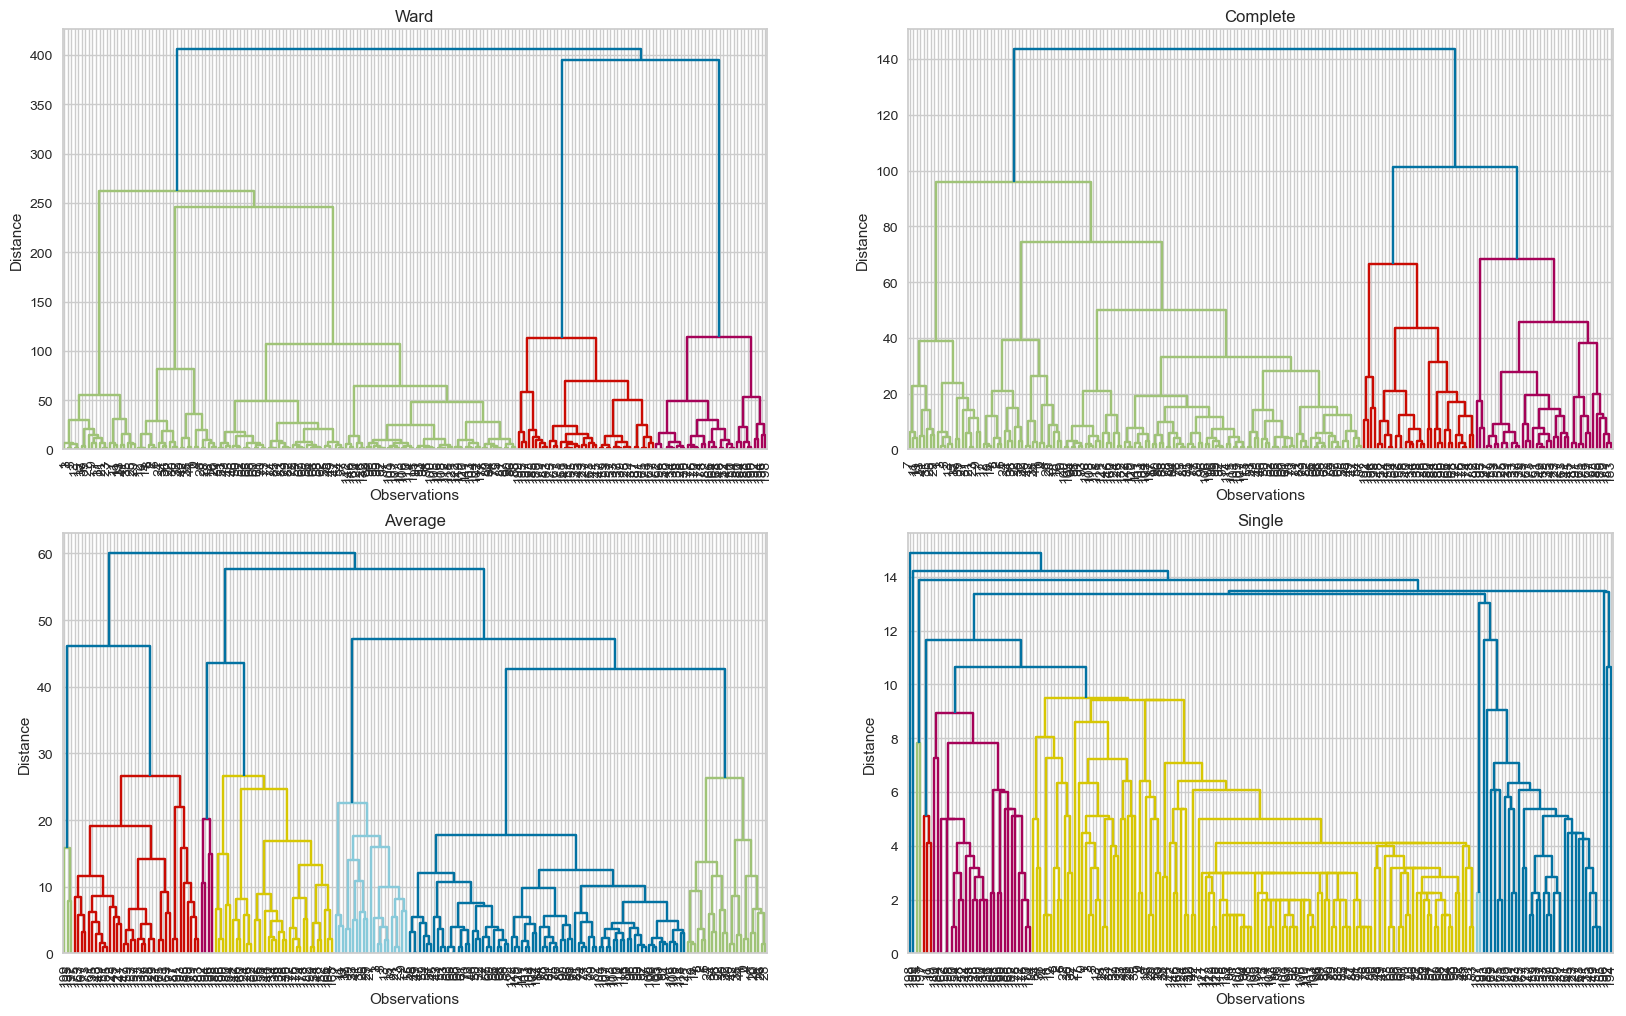

In [320]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

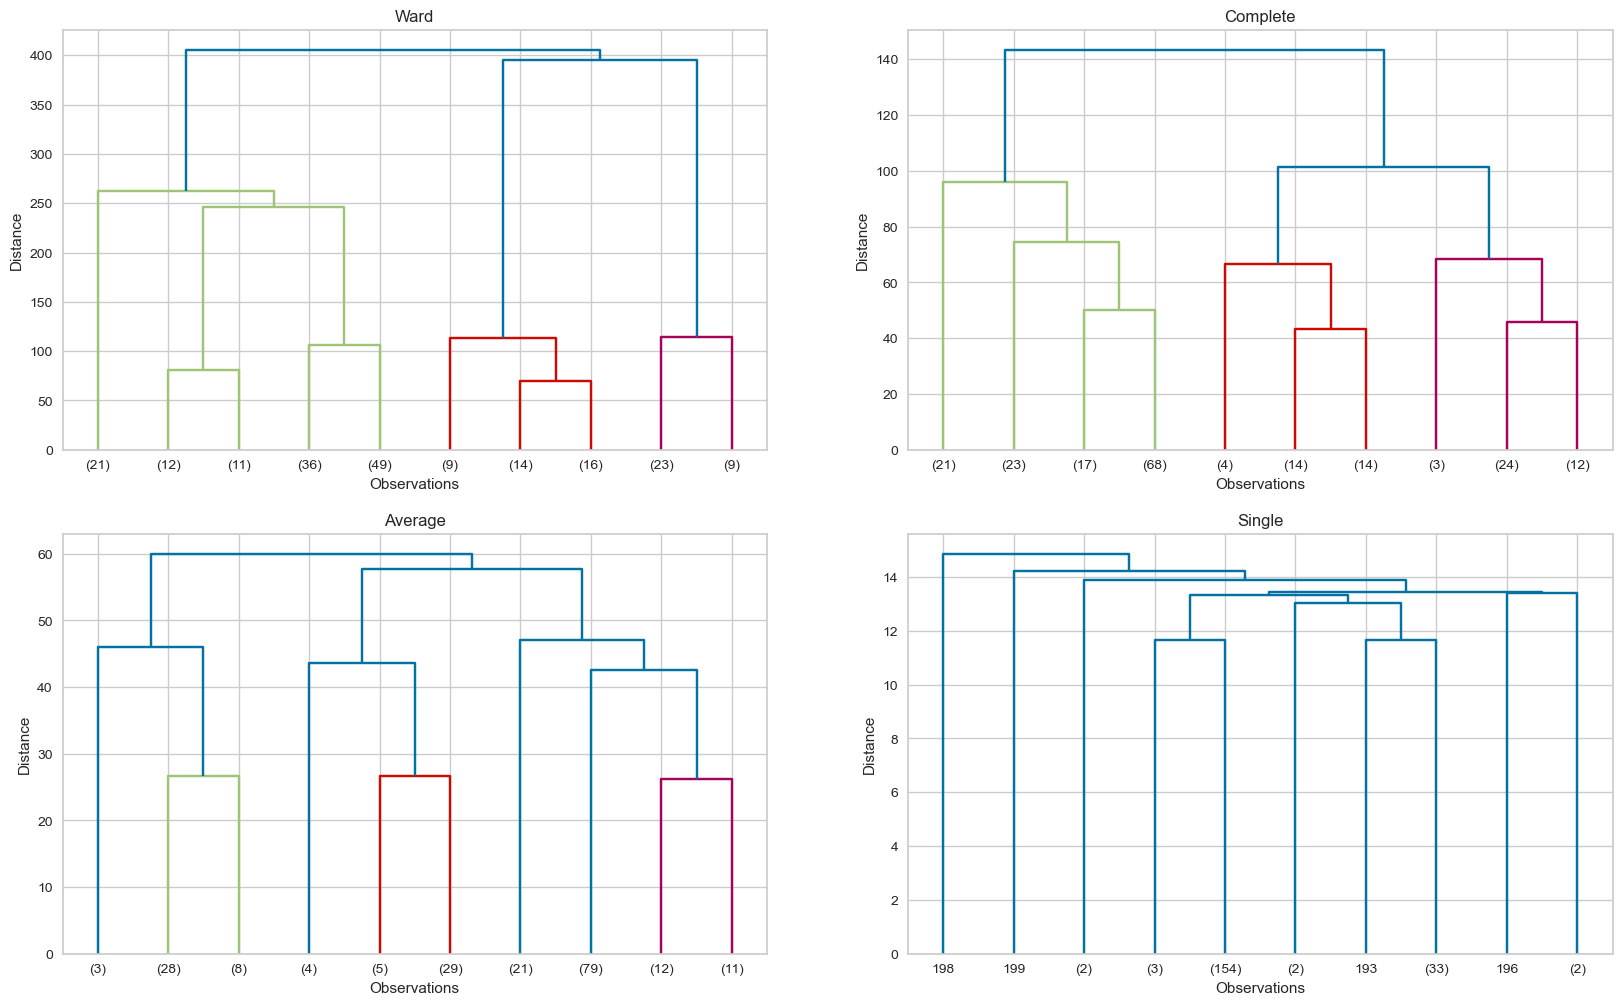

In [321]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [322]:
from sklearn.cluster import AgglomerativeClustering

In [323]:
model = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "ward")
# default değerleri ile modeli çalıştırıyoruz.

In [324]:
model.fit_predict(X1)
# k-means'te olduğu hierarchical clustarın predict özelliği yoktur. Tek başına çalışmaz

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [325]:
model.labels_
# fit veya fit_predict yaptıktan sonra label_ attirbute ile clusterları görebiliriz.

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [326]:
from sklearn.metrics import silhouette_score

In [328]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


In [329]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [331]:
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


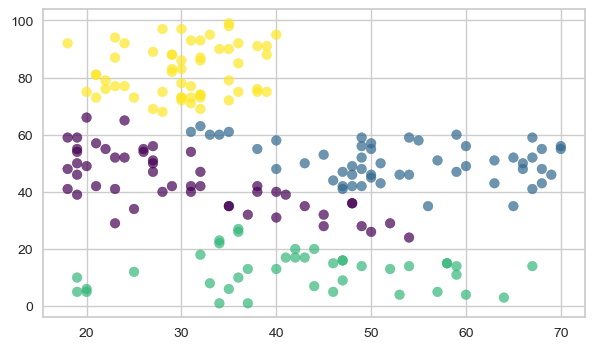

In [332]:
plt.scatter(X1["Age"], X1["Spending_Score"], c = model1.labels_, cmap = "viridis", alpha =0.7);

#### Annual Income and Spending Score- x2

In [437]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [334]:
model = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "ward")

In [335]:
model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [336]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [337]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [338]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

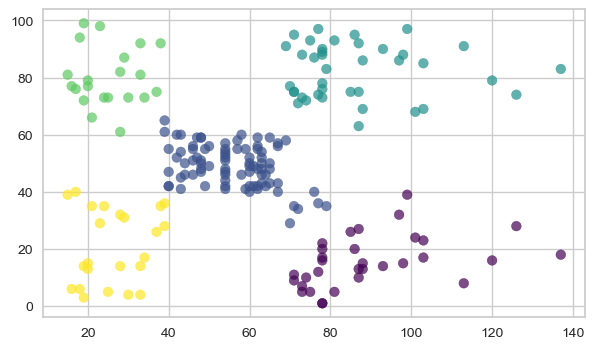

In [339]:
plt.scatter(X2["Annual_Income"], X2["Spending_Score"], c = model2.labels_, cmap = "viridis", alpha =0.7)


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [340]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

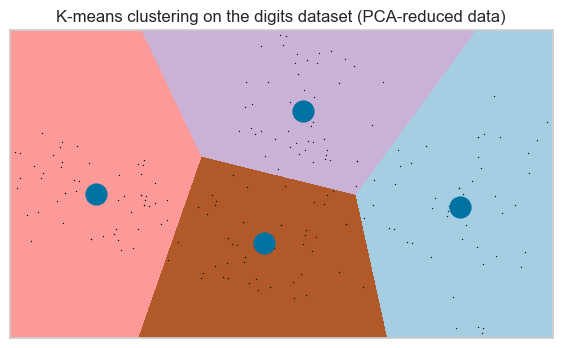

In [441]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(X1)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids 
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="o",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)"
   
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Annual Income and Spending Score- x2


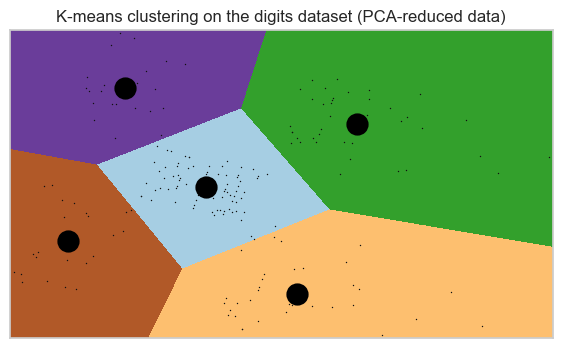

In [440]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(X2)
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids 
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="o",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)"
    
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Interpretation based on Age and Spending Score- x

In [427]:
df_1 = df[["Gender","Annual_Income","Age","Spending_Score"]]
df_1.head()


,Gender,Annual_Income,Age,Spending_Score
0,Male,15,19,39
1,Male,15,21,81
2,Female,16,20,6
3,Female,16,23,77
4,Female,17,31,40
5,Female,17,22,76
6,Female,18,35,6
7,Female,18,23,94
8,Male,19,64,3
9,Female,19,30,72


In [428]:
df_1["Clusters_Age_SpendingScore"] = model1.labels_

In [429]:
df_1.head()

,Gender,Annual_Income,Age,Spending_Score,Clusters_Age_SpendingScore
0,Male,15,19,39,0
1,Male,15,21,81,3
2,Female,16,20,6,2
3,Female,16,23,77,3
4,Female,17,31,40,0
5,Female,17,22,76,3
6,Female,18,35,6,2
7,Female,18,23,94,3
8,Male,19,64,3,2
9,Female,19,30,72,3


In [430]:
df_1.Clusters_Age_SpendingScore.value_counts()

3    57
1    53
0    50
2    40
Name: Clusters_Age_SpendingScore, dtype: int64

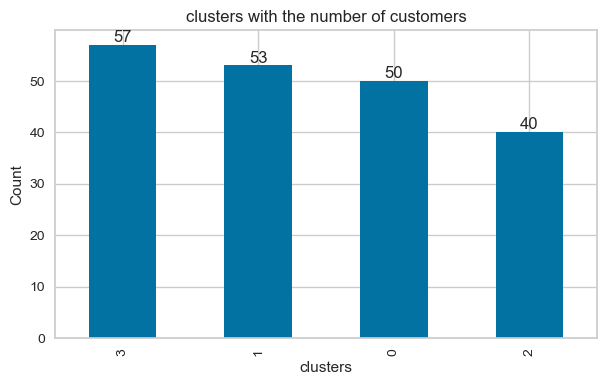

In [380]:
plt.title("The Number of Customer with Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")
ax = df_1.Clusters_Age_SpendingScore.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

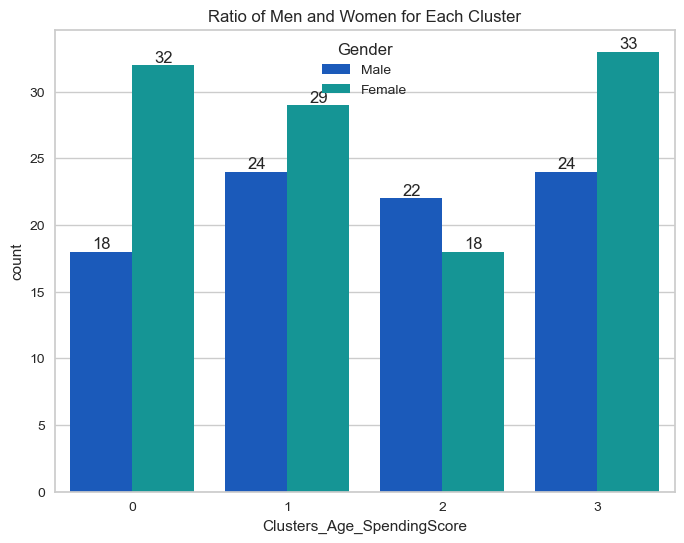

In [410]:
plt.figure(figsize=(8,6))
plt.title("Ratio of Men and Women for Each Cluster")
ax =sns.countplot(x=df_1["Clusters_Age_SpendingScore"], hue=df_1["Gender"],palette="winter")
for p in ax.containers:
    ax.bar_label(p)


In [431]:
df_1.groupby(["Gender","Clusters_Age_SpendingScore"]).mean()

Annual_Income        Age  Spending_Score
Gender Clusters_Age_SpendingScore                                          
Female 0                               58.250000  31.093750       42.281250
       1                               54.344828  52.172414       50.068966
       2                               60.777778  43.111111       14.944444
       3                               63.696970  29.787879       81.727273
Male   0                               51.333333  29.500000       46.000000
       1                               54.041667  54.375000       50.916667
       2                               72.318182  42.272727       10.090909
       3                               69.333333  30.708333       83.208333

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [438]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [414]:
df_2 = df[["Gender","Age","Spending_Score","Annual_Income"]]
df_2.head()

,Gender,Age,Spending_Score,Annual_Income
0,Male,19,39,15
1,Male,21,81,15
2,Female,20,6,16
3,Female,23,77,16
4,Female,31,40,17
5,Female,22,76,17
6,Female,35,6,18
7,Female,23,94,18
8,Male,64,3,19
9,Female,30,72,19


In [415]:
df_2["Clusters_Annual_Income_SpendingScore"] = model2.labels_

In [439]:
df_2.head()

,Gender,Age,Spending_Score,Annual_Income,Clusters_Annual_Income_SpendingScore
0,Male,19,39,15,4
1,Male,21,81,15,3
2,Female,20,6,16,4
3,Female,23,77,16,3
4,Female,31,40,17,4


In [417]:
df_2.Clusters_Annual_Income_SpendingScore.value_counts()

1    85
2    39
0    32
4    23
3    21
Name: Clusters_Annual_Income_SpendingScore, dtype: int64

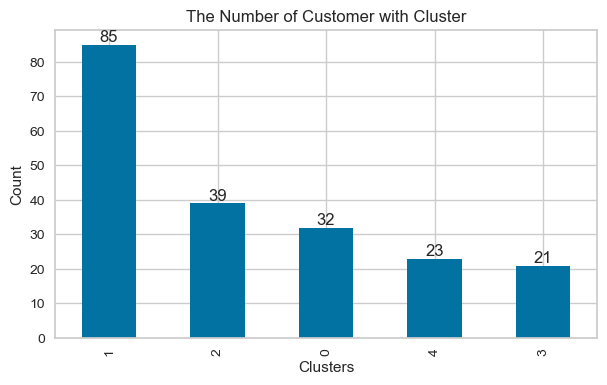

In [418]:
plt.title("The Number of Customer with Cluster")
plt.xlabel("Clusters")
plt.ylabel("Count")
ax = df_2.Clusters_Annual_Income_SpendingScore.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

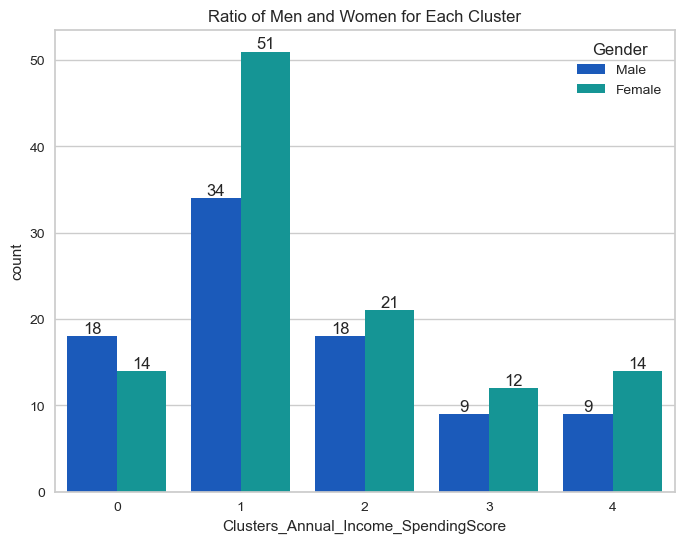

In [419]:
plt.figure(figsize=(8,6))
plt.title("Ratio of Men and Women for Each Cluster")
ax =sns.countplot(x=df_2["Clusters_Annual_Income_SpendingScore"], hue=df_2["Gender"],palette="winter")
for p in ax.containers:
    ax.bar_label(p)


In [422]:
df_2.groupby(["Gender", "Clusters_Annual_Income_SpendingScore"]).mean()

Age  Spending_Score  \
Gender Clusters_Annual_Income_SpendingScore                              
Female 0                                     43.785714       20.642857   
       1                                     40.509804       48.647059   
       2                                     32.190476       81.666667   
       3                                     25.583333       81.833333   
       4                                     43.214286       21.714286   
Male   0                                     38.833333       11.666667   
       1                                     45.441176       49.852941   
       2                                     33.277778       82.666667   
       3                                     25.000000       77.666667   
       4                                     48.333333       19.666667   

                                             Annual_Income  
Gender Clusters_Annual_Income_SpendingScore                 
Female 0                                         93.285714  
       1                                         55.784314  
       2                                         86.047619  
       3                                         24.583333  
       4                                         27.357143  
Male   0                                         86.388889  
       1                                         55.852941  
       2                                         87.111111  
       3                                         25.777778  
       4                                         24.666667

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

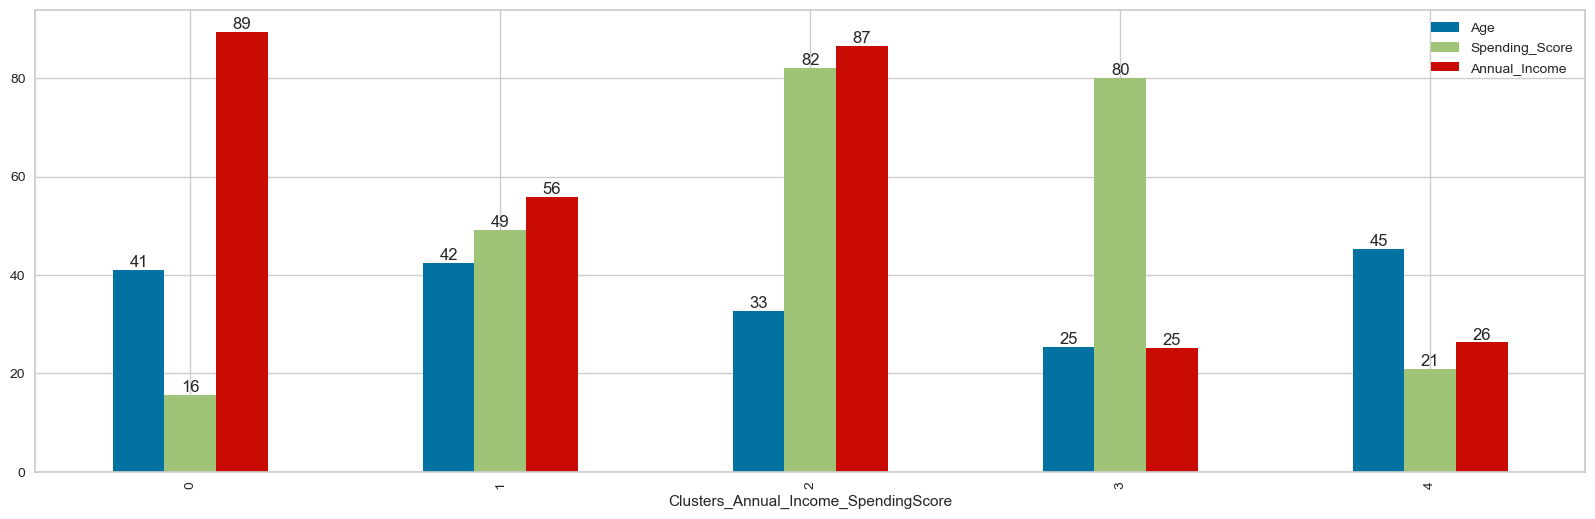

In [434]:
ax = df_2.groupby("Clusters_Annual_Income_SpendingScore").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.